# Functions

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
import os
%matplotlib inline

In [12]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [16]:
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1212\\'
# exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20211209\\'
ensure_dir(exp_folder+'STA')
ensure_dir(exp_folder+'STA\\Fig')

In [17]:
for filename in os.listdir(exp_folder+'merge\\'):
    if filename.find('HMM')==-1 and filename.find('OU')==-1 and filename.find('WN')==-1:
        continue
#     elif filename.find('grating')==-1 and filename.find('GP')==-1:
#         continue
    print(filename)
    annots = loadmat(exp_folder+'merge\\'+filename, squeeze_me = True)
#     if np.squeeze(annots['Video']['stimulation_type']) != 'Bar':
#         continue
#     elif np.squeeze(annots['Video']['series_type']) != 'HMM' and np.squeeze(annots['Video']['series_type']) != 'OUsmooth' and np.squeeze(annots['Video']['series_type']) != 'OU':
#         continue
#     if np.squeeze(annots['type']) != 'HMM' and np.squeeze(annots['type']) != 'OUsmooth' and np.squeeze(annots['type']) != 'OU':
#         continue
    
    x = np.squeeze(annots['bin_pos'])
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    dt = 1./60.
    tAxis = np.arange(len(x))*dt+0.5*dt
    tEdge = np.arange(len(x)+1)*dt

    XcT = tAxis-tAxis[int(len(tAxis)/2)]

    window = [-1,1] # second
    timeshift = np.arange(window[0], window[1]+dt, dt)
    STA_cell = [0]*60
    for channelnumber in np.arange(1,61):
        rstate, _ = np.histogram(annots['reconstruct_spikes'][channelnumber-1], tEdge)
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue

        nXcorr = np.correlate(x, rstate, 'same')/np.correlate(np.ones_like(x), rstate, 'same')
        STA_cell[channelnumber-1] = nXcorr[np.arange(np.where(XcT == window[0])[0],np.where(XcT ==  window[1])[0]+1)]
        # timeshift, Information = MIfunc(rstate, xstate, dt, window, perSpike = True)
        # Information_cell[channelnumber-1] = Information.copy()
    np.savez(exp_folder+'STA\\STA_'+filename[:-4]+'.npz', STA_cell = STA_cell, timeshift = timeshift)

merge_1211_LPOU_G4.5_1Hz_SW_hw8_long_RL_10v0mW_0.mat


C:\Users\hydro_leo\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


merge_1211_LPOU_G4.5_1Hz_SW_hw8_long_UD_10v0mW_0.mat
merge_1211_LPOU_G4.5_1Hz_SW_hw8_long_UL_DR_10v0mW_0.mat
merge_1211_LPOU_G4.5_1Hz_SW_hw8_long_UR_DL_10v0mW.mat
merge_1211_LPOU_G4.5_1Hz_SW_hw8_long_UR_DL_10v0mW_0.mat
merge_1211_LPOU_G4.5_2Hz_SW_hw8_long_UR_DL_10v0mW.mat
merge_1211_LPOU_G4.5_4Hz_SW_hw8_long_UR_DL_10v0mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__10-0.05mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__10-0.1mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__10-0.2mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__10-0.3mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__13-0.05mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__13-0.1mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__13-0.2mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__13-0.3mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__19-0.05mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__19-0.1mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__19-0.2mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__19-0.3mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__31-0.05mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__31-0.1mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__31-0.2mW.mat
merge_1211_WF_LPOU_G4.5_1Hz__31-0.3mW.m

# check rename order with input

In [ ]:
import warnings
warnings.simplefilter('ignore')

x_list = []
for filename in os.listdir(exp_folder):
    if filename.find('diode_WhiteNoise_mean=10_C=0.2')==-1:
        continue
    print(filename)
    annots = loadmat(exp_folder+filename)
    dt = 0.01
    sampling_rate = 20000
    TimeStamps = np.squeeze(annots['TimeStamps'])
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    # x = (x-np.mean(x))/np.std(x)
    T=np.arange(len(x))*dt
    x_list.append(x.copy())

diode_WhiteNoise_mean=10_C=0.2_03-Dec-2021_7.mat
diode_WhiteNoise_mean=10_C=0.2_04-Dec-2021_0.mat


(15000.0, 15200.0)

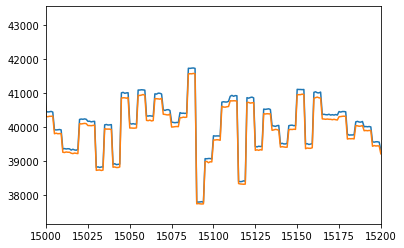

In [ ]:
for x in x_list:
    plt.plot(x)
plt.xlim(15000,15200)

# Check Spike Train

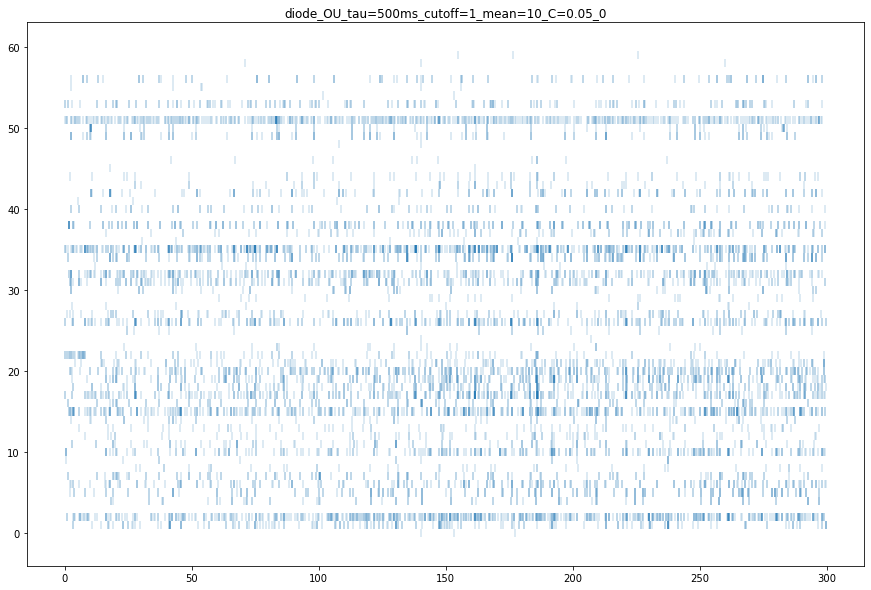

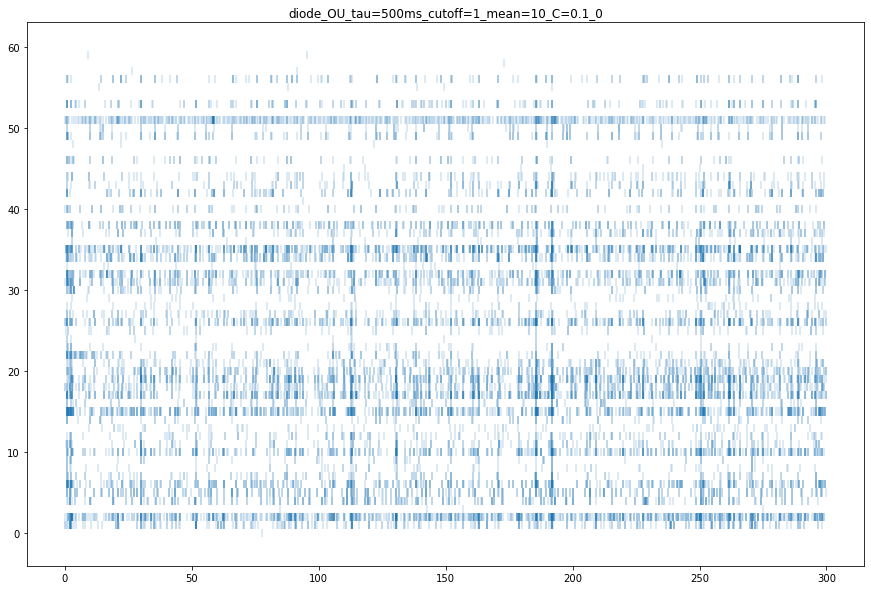

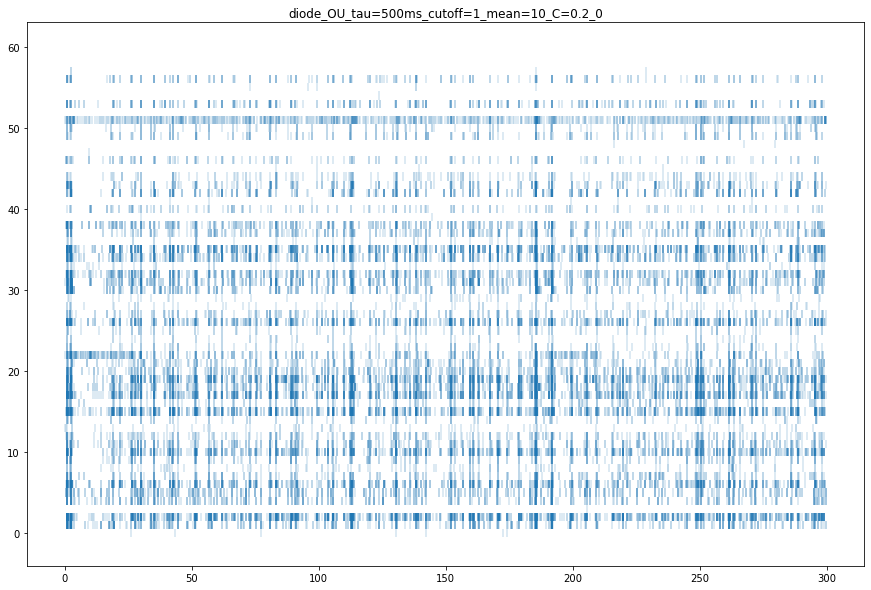

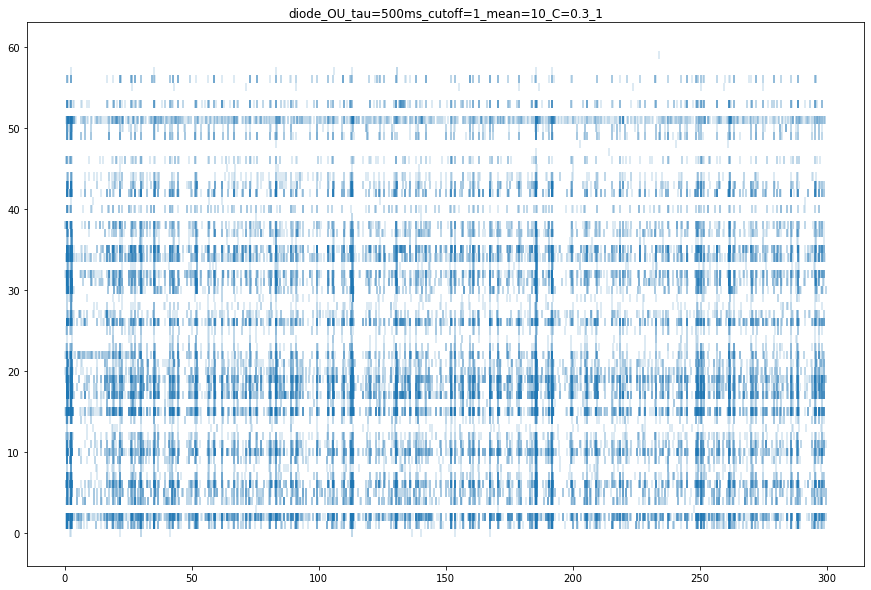

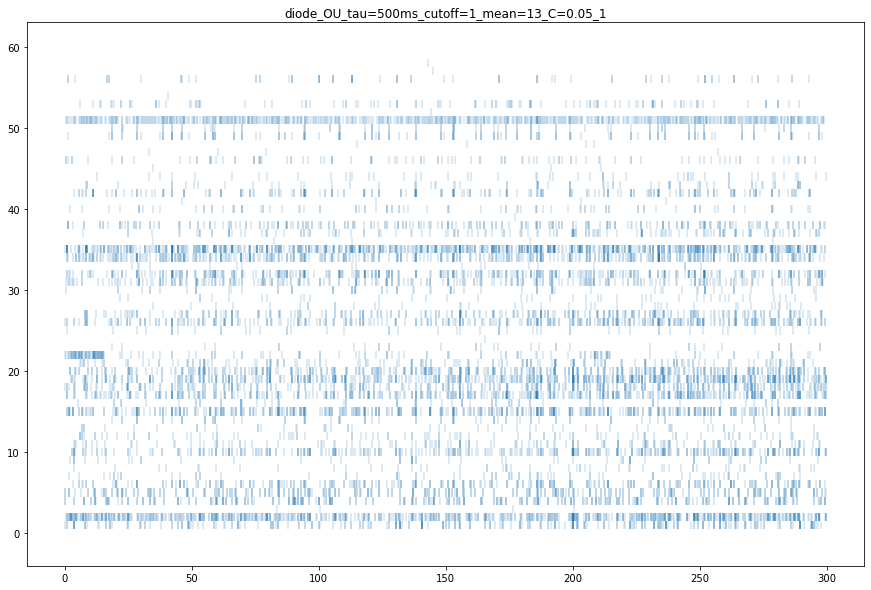

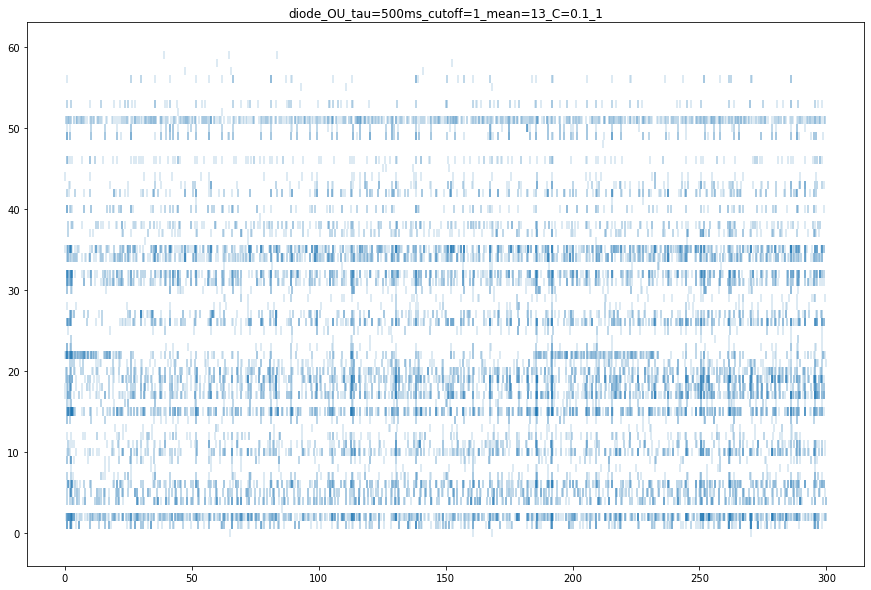

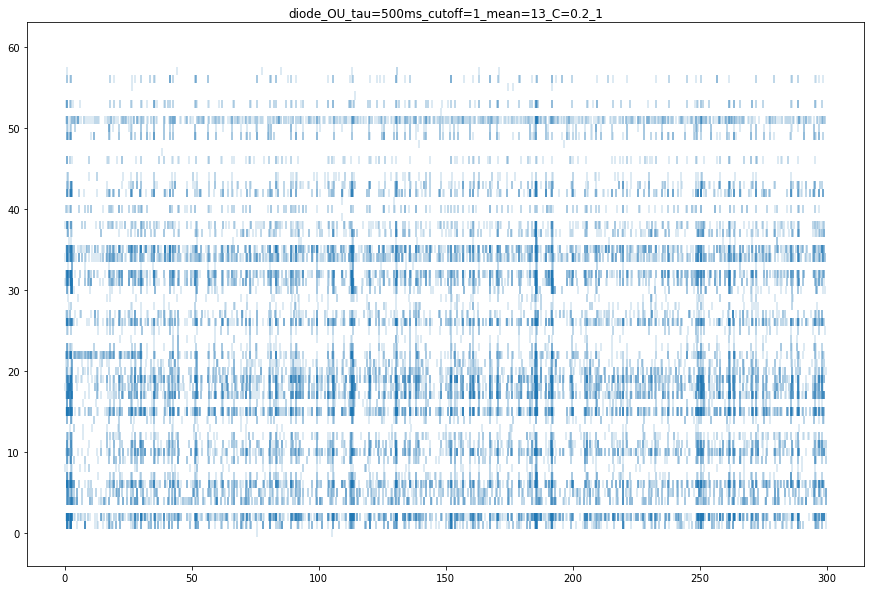

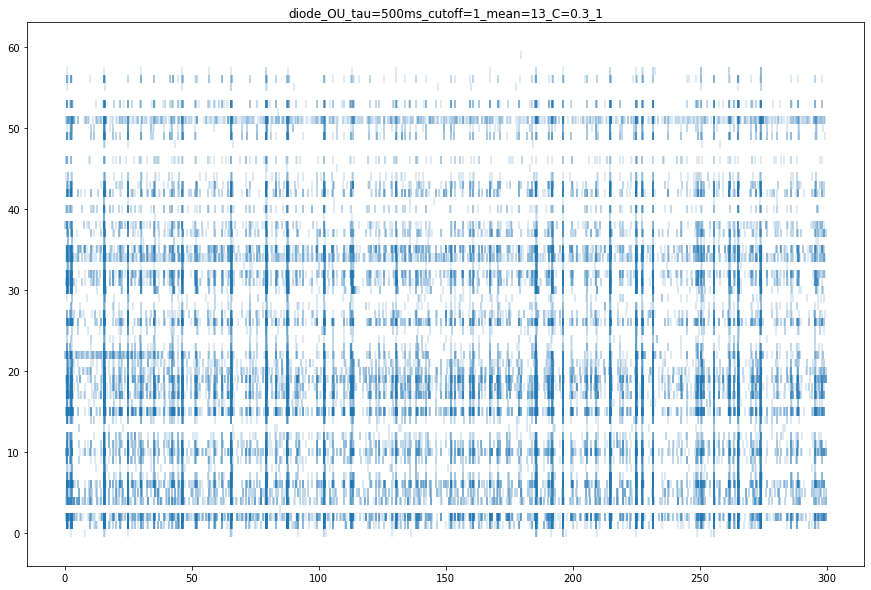

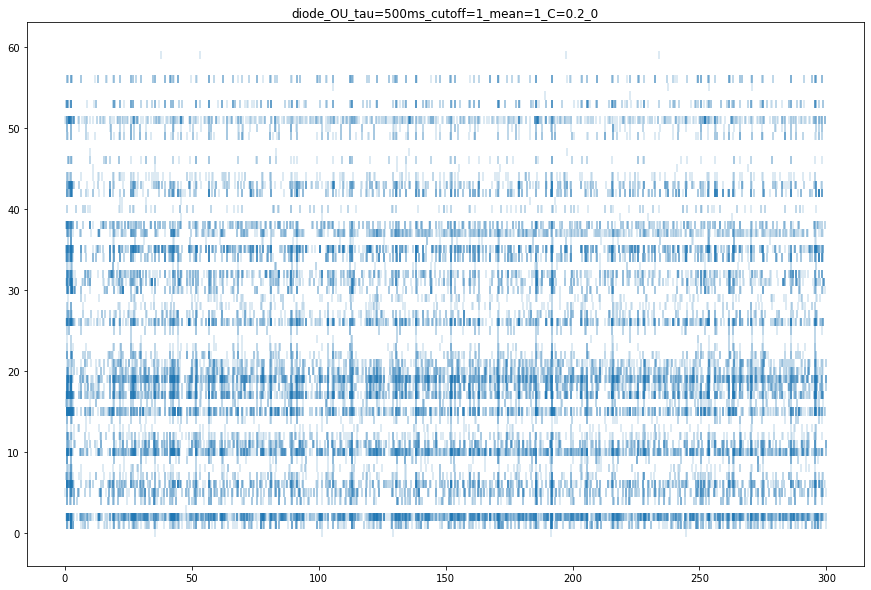

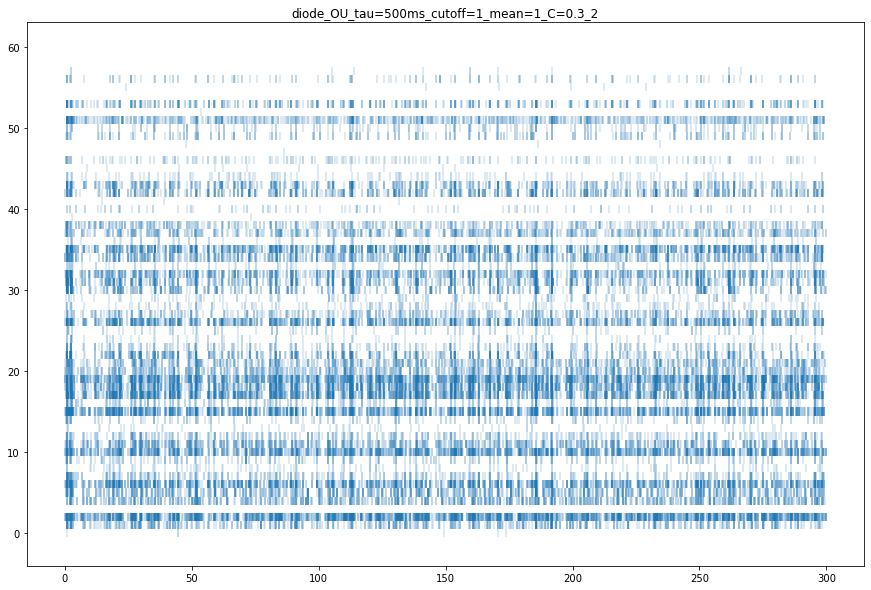

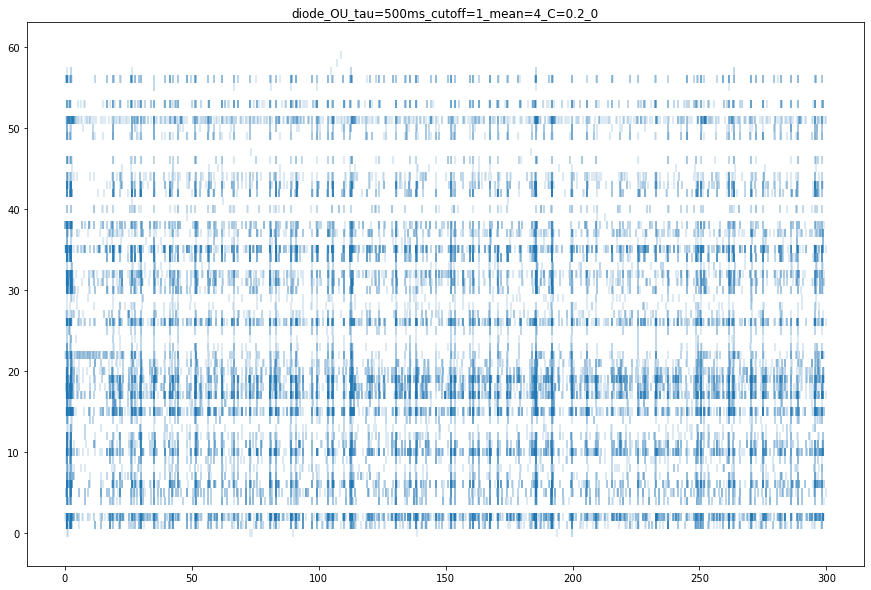

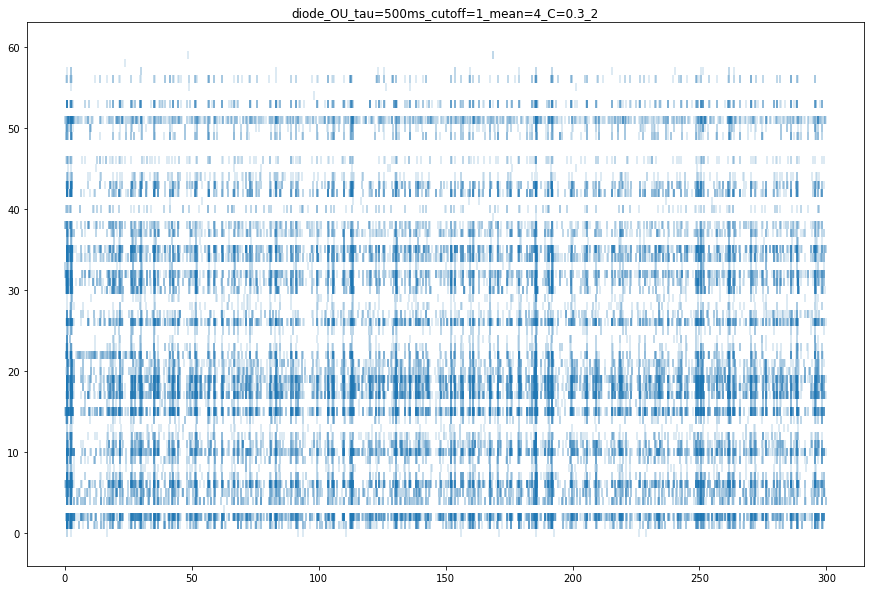

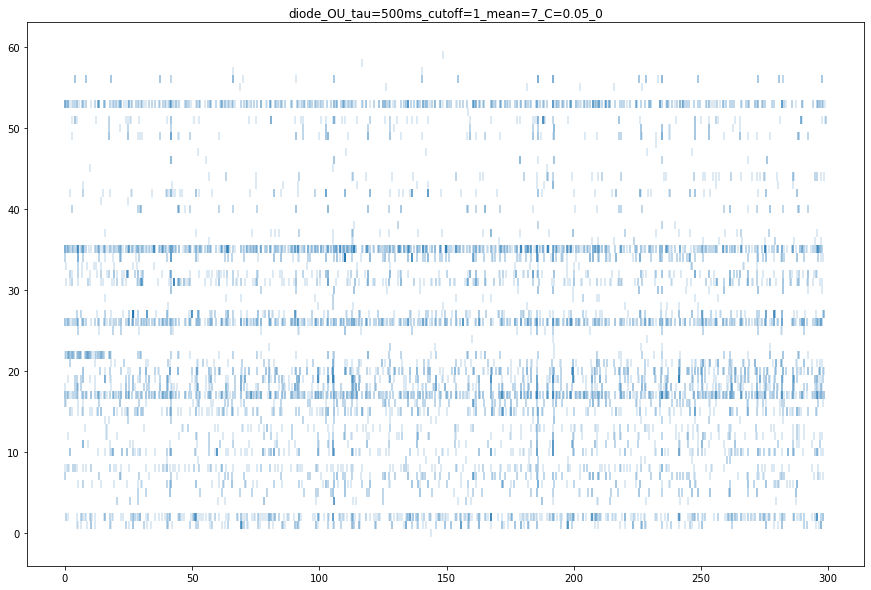

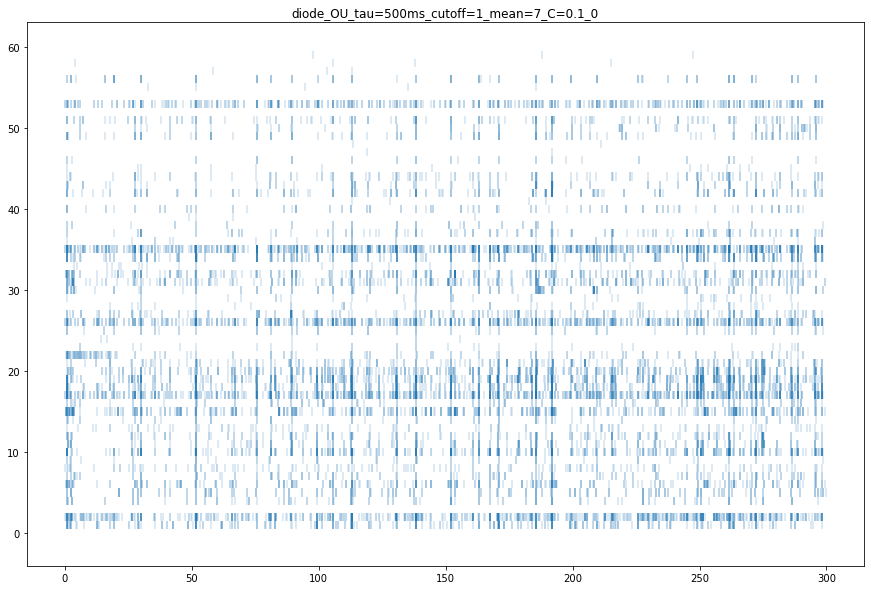

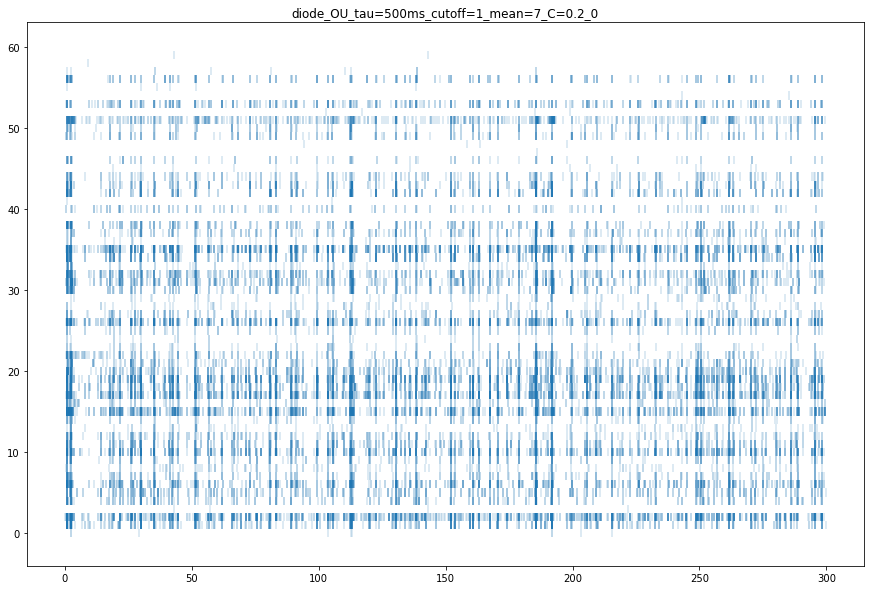

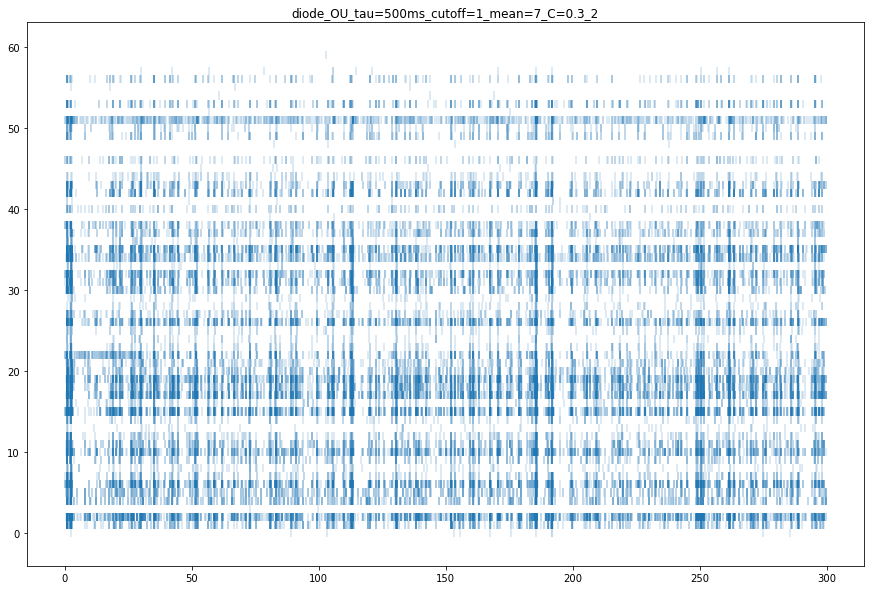

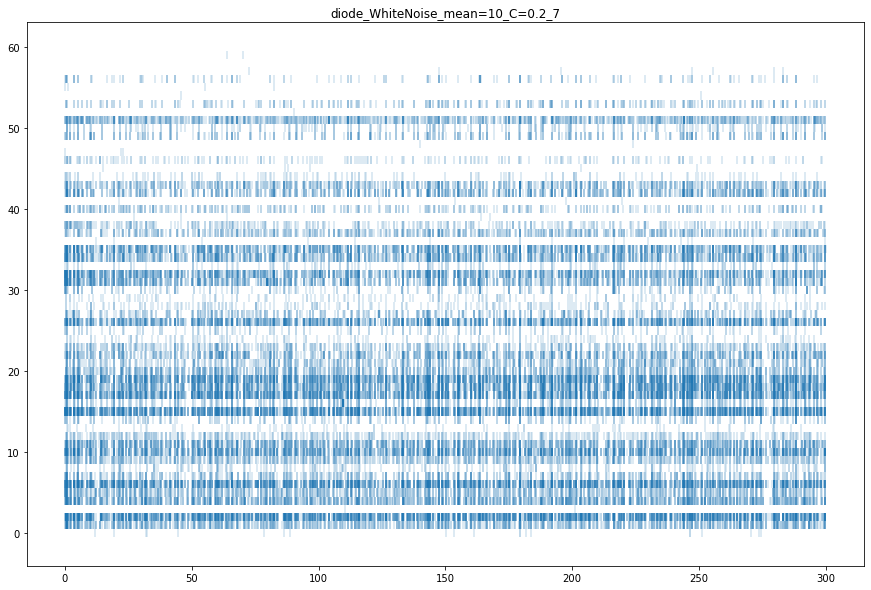

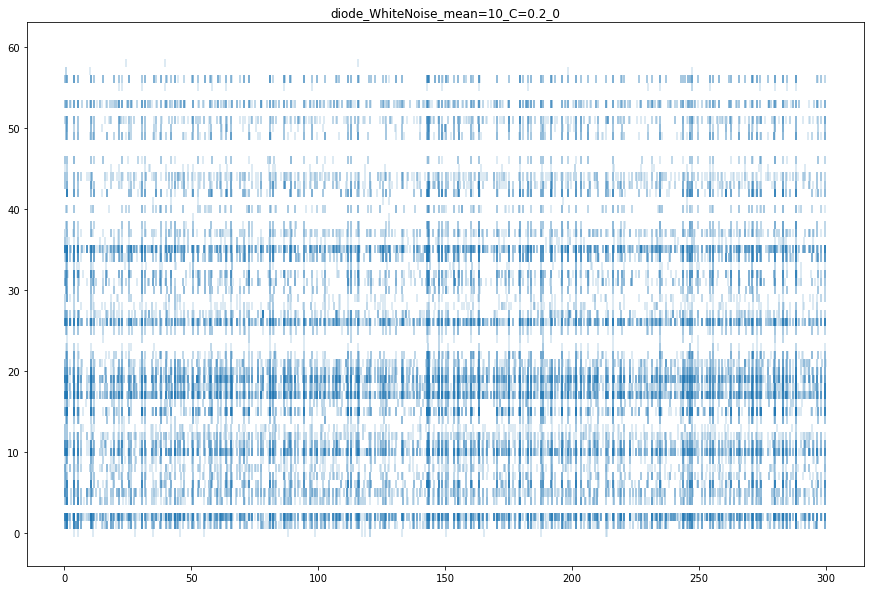

In [ ]:
import warnings
warnings.simplefilter('ignore')

dt = 0.01
sampling_rate = 20000
Index = np.hstack( (np.arange(3),np.arange(4,60)) )
for filename in os.listdir(exp_folder):
    # if not (filename.find('repeat')==-1) or (filename.find('.mat')==-1):
    if filename.find('mat')==-1:
        continue

    annots = loadmat(exp_folder+filename, squeeze_me = True)
    TicTocer = annots['a_data'][1]
    startPoint = np.where(TicTocer>38000)[0][0]
    endPoint = np.where(TicTocer>38000)[0][-1]
    Spike_cell = [0]*60
    for channelnumber in np.arange(1,61):
        try:
            Spike = annots['Spikes'][channelnumber-1]
            Spike_cell[channelnumber-1] = Spike[np.where(Spike>startPoint/sampling_rate)[0][0]:np.where(Spike<endPoint/sampling_rate)[0][-1]]-startPoint/sampling_rate
        except: 
            Spike_cell[channelnumber-1] = np.array([])
    fig, ax = plt.subplots()
    ax.eventplot(Spike_cell, linewidths=0.3)
    ax.set_title(filename[:-17]+filename[-5])
    fig.set_size_inches(15, 10)

# Test Statics of Gamma Process

In [ ]:
import warnings
warnings.simplefilter('ignore')

CV = []
for filename in os.listdir(exp_folder):
    if not (filename.find('repeat')==-1) or (filename.find('.mat')==-1):
        continue
    print(filename[:-17]+filename[-5])
    annots = loadmat(exp_folder+filename, squeeze_me=True)
    dt = 0.01
    sampling_rate = 20000


    for channelnumber in np.arange(1,61):
        Spike = annots['Spikes'][channelnumber-1]
        try:
            Spike = Spike[np.where(Spike>=TimeStamps[0])[0][0]:np.where(Spike<TimeStamps[-1])[0][-1]]-TimeStamps[0]
            ISI = np.diff(Spike)
            CV.append( np.std(ISI)/np.mean(ISI) )
        except:
            continue
CV = np.array(CV)
CV = CV[~np.isnan(CV)]

diode_OU_tau=500ms_cutoff=1_mean=10_C=0.05_0
diode_OU_tau=500ms_cutoff=1_mean=10_C=0.1_0
diode_OU_tau=500ms_cutoff=1_mean=10_C=0.2_0
diode_OU_tau=500ms_cutoff=1_mean=10_C=0.3_1
diode_OU_tau=500ms_cutoff=1_mean=13_C=0.05_1
diode_OU_tau=500ms_cutoff=1_mean=13_C=0.1_1
diode_OU_tau=500ms_cutoff=1_mean=13_C=0.2_1
diode_OU_tau=500ms_cutoff=1_mean=13_C=0.3_1
diode_OU_tau=500ms_cutoff=1_mean=1_C=0.2_0
diode_OU_tau=500ms_cutoff=1_mean=1_C=0.3_2
diode_OU_tau=500ms_cutoff=1_mean=4_C=0.2_0
diode_OU_tau=500ms_cutoff=1_mean=4_C=0.3_2
diode_OU_tau=500ms_cutoff=1_mean=7_C=0.05_0
diode_OU_tau=500ms_cutoff=1_mean=7_C=0.1_0
diode_OU_tau=500ms_cutoff=1_mean=7_C=0.2_0
diode_OU_tau=500ms_cutoff=1_mean=7_C=0.3_2
diode_WhiteNoise_mean=10_C=0.2_7
diode_WhiteNoise_mean=10_C=0.2_0


(0.0, 3.0)

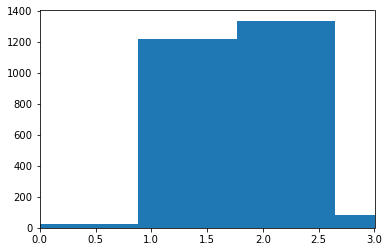

In [ ]:
plt.hist(CV, 50)
plt.xlim(0,3)

In [ ]:
(1/np.mean(CV))**2

0.18346993736101275

# 0513
diode_OU_tau=500ms_cutoff=0_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.2_07-Jul-2021_0.mat:    2 -0.4 <br>
diode_OU_tau=500ms_cutoff=2_coeff=0.6_07-Jul-2021_0.mat:    6 -1.2 <br>
diode_OU_tau=500ms_cutoff=2_coeff=1.5_07-Jul-2021_0.mat:    15-3 <br>
diode_OU_tau=500ms_cutoff=2_mean10_amp2_07-Jul-2021_0.mat:  10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=10_07-Jul-2021_0.mat: 10-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=15_07-Jul-2021_0.mat: 15-2 <br>
diode_OU_tau=500ms_cutoff=2_meaninten=5_07-Jul-2021_0.mat:  5 -2 <br>
diode_WhiteNoise_mean=5_07-Jul-2021_0.mat:                  5 -2 <br>
diode_WhiteNoise_mean=10_07-Jul-2021_0.mat:                 10-2 <br>
diode_WhiteNoise_mean=15_07-Jul-2021_0.mat:                 15-2 <br>

# 0716
